# Import libraries

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# DataSet Load and Pre-processing

In [2]:
# File upload
from google.colab import files
uploaded = files.upload()

Saving test_knn.txt to test_knn.txt
Saving train_knn.txt to train_knn.txt


In [3]:
train_file = np.loadtxt('/content/train_knn.txt',delimiter=',')
test_file = np.loadtxt('/content/test_knn.txt',delimiter=',')

In [4]:
 print(train_file,test_file,sep='\n==========\n') 

[[7. 7. 1.]
 [7. 4. 1.]
 [6. 4. 1.]
 [7. 5. 1.]
 [7. 6. 1.]
 [6. 7. 1.]
 [6. 6. 1.]
 [3. 4. 2.]
 [2. 3. 2.]
 [3. 2. 2.]
 [4. 3. 2.]
 [3. 3. 2.]
 [4. 4. 2.]
 [1. 4. 2.]]
[[3. 7.]
 [7. 7.]
 [4. 3.]
 [2. 8.]
 [3. 5.]
 [1. 2.]
 [4. 8.]
 [8. 3.]
 [8. 4.]]


# Train Data Analysis

In [5]:
class_A = []
class_B = []
x1 = []
x2 = [] 
y1 = [] 
y2 = []
for data in train_file:
  if data[2] == 1:
    class_A.append(data)
    x1.append(data[0])
    y1.append(data[1])
  else:
    class_B.append(data)
    x2.append(data[0])
    y2.append(data[1])

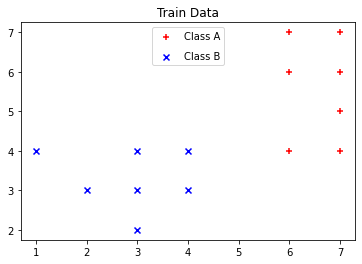

In [6]:
fig, ax = plt.subplots(1,1,squeeze=True)
plt.title('Train Data')
ax.scatter(x1,y1,marker='+',color='r',label='Class A')
ax.scatter(x2,y2,marker='x',color='b',label='Class B')
legend = ax.legend(loc='upper center', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

# K-NN implementation

In [72]:
# Model Designing

def distance(p1,p2):
  return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

text = open('prediction.txt','a')

def KNN(k,test_value):

  text.write('Test Point: {},{}\n'.format(test_value[0],test_value[1]))
  distance_values = []

  for idx in train_file:
    diff = distance(idx,test_value)
    distance_values.append([diff,idx[2]])

  clssA = 0
  clssB = 0
  
  distance_values.sort(key = lambda value: value[0])

  for idx in range(k):
    d = idx+1
    text.write("Distance {}: {:0.2f} \t Class:{}\n".format(d, distance_values[idx][0], distance_values[idx][1]))
    if distance_values[idx][1]==1:
      clssA = clssA + 1
    else:
      clssB = clssB + 1
  if clssA>clssB:
    text.write('Predicted Class {}\n'.format(1))
  else:
    text.write('Predicted Class {}\n'.format(2))
  
  text.write('\n')

In [73]:
# Input value of K 
k = input('Enter value of K : ')
k = int(k)
for idx in test_file:
  KNN(k,idx)
text.close()

Enter value of K : 5
